**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [3]:
#%%pycodestyle
from sklearn.neighbors import KDTree


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = X
        self.y = y
        if (self.algorithm == 'kd_tree'):
            self.tree = KDTree(X)

    def predict(self, X):
        if (self.algorithm == 'brute'):
            from scipy.spatial.distance import cdist
            dist_matrix = cdist(X, self.X_train)
            index = np.argpartition(dist_matrix, self.n_neighbors)
            index = index[:, :self.n_neighbors]
        else:
            q, index = self.tree.query(X, k=self.n_neighbors)
        class_near_point = self.y[index].astype(int)
        near = []
        for el in class_near_point:
            near.append(np.argmax(np.bincount(el)))
        return np.array(near)

    def predict_proba(self, X):
        diff_target = np.unique(self.y).shape[0]
        if (self.algorithm == 'brute'):
            from scipy.spatial.distance import cdist
            dist_matrix = cdist(X, self.X_train)
            index = np.argpartition(dist_matrix, self.n_neighbors)
            index = index[:, :self.n_neighbors]
        elif(self.algorithm == 'kd_tree'):
            q, index = self.tree.query(X, k=self.n_neighbors)
        class_near_point = self.y[index].astype(int)
        res = np.zeros((X.shape[0], diff_target))
        for i in range(X.shape[0]):
            for el in class_near_point[i]:
                res[i][el] += 1
        return res / self.n_neighbors

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

**IRIS**

In [47]:
iris = datasets.load_iris()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [49]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [50]:
%time clf.fit(X_train, y_train)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 963 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [51]:
%time my_clf.fit(X_train, y_train)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.4 µs


In [52]:
%time clf.predict(X_test)

CPU times: user 2.25 ms, sys: 283 µs, total: 2.53 ms
Wall time: 2.19 ms


array([1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2])

In [53]:
%time my_clf.predict(X_test)

CPU times: user 1.9 ms, sys: 238 µs, total: 2.14 ms
Wall time: 1.42 ms


array([1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2])

In [54]:
%time clf.predict_proba(X_test)

CPU times: user 1.61 ms, sys: 201 µs, total: 1.81 ms
Wall time: 1.46 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 903 µs


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [56]:
clf.score(X_test, y_test)

1.0

In [57]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Best score while N = 1


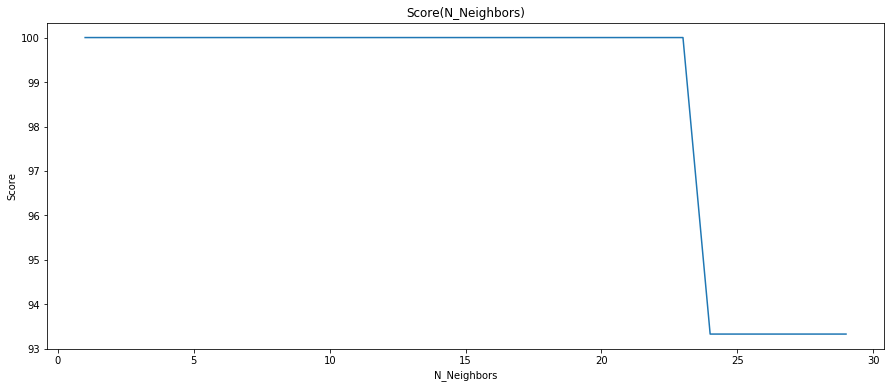

In [58]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(15, 6))
A = []
for i in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y = clf.score(X_test, y_test)*100
    A.append(y)
ax.plot(range(1, 30), A)
ax.set_title('Score(N_Neighbors)')
ax.set_ylabel('Score')
ax.set_xlabel('N_Neighbors')
N_best_score = np.argmax(A) + 1
print('Best score while N =',N_best_score)

**MNIST**

In [59]:
mnist = fetch_mldata('MNIST original')

/home/ruslanallayarov/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/ruslanallayarov/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [61]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [62]:
%time clf.fit(X_train, y_train)

CPU times: user 49.9 s, sys: 199 ms, total: 50.1 s
Wall time: 50.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [62]:
%time my_clf.fit(X_train, y_train)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 17.6 µs


In [94]:
%time clf.predict(X_test)

CPU times: user 1min 7s, sys: 0 ns, total: 1min 7s
Wall time: 1min 7s


array([1, 7, 4, 0, 4, 0, 5, 4, 8, 5, 8, 1, 5, 1, 6, 1, 4, 5, 6, 9, 7, 2,
       3, 5, 9, 2, 0, 6, 7, 8, 2, 2, 5, 7, 4, 5, 3, 2, 9, 2, 0, 9, 1, 9,
       4, 4, 8, 2, 7, 1, 5, 2, 0, 4, 0, 8, 9, 8, 9, 2, 1, 9, 9, 4, 3, 2,
       1, 3, 6, 0, 3, 8, 2, 0, 7, 1, 6, 6, 8, 2, 3, 7, 5, 3, 1, 6, 3, 3,
       8, 7, 7, 4, 6, 5, 0, 1, 8, 0, 8, 8, 6, 3, 4, 2, 1, 0, 0, 5, 5, 3,
       5, 4, 3, 2, 7, 3, 7, 6, 4, 4, 0, 8, 9, 9, 3, 8, 1, 0, 8, 4, 1, 7,
       4, 2, 9, 8, 8, 8, 7, 8, 0, 8, 1, 1, 7, 4, 8, 7, 1, 8, 8, 5, 5, 2,
       3, 7, 0, 9, 0, 2, 4, 3, 6, 7, 1, 8, 1, 3, 9, 1, 7, 0, 9, 3, 7, 2,
       7, 7, 4, 8, 1, 3, 3, 7, 2, 7, 2, 0, 9, 1, 5, 6, 5, 5, 2, 3, 5, 1,
       2, 1, 0, 4, 2, 1, 4, 5, 7, 2, 0, 7, 4, 3, 6, 3, 1, 6, 3, 1, 3, 7,
       8, 7, 6, 8, 9, 4, 4, 3, 3, 1, 9, 9, 1, 9, 4, 1, 3, 1, 2, 7, 7, 7,
       5, 9, 0, 7, 3, 7, 4, 9, 3, 2, 0, 2, 4, 6, 7, 6, 0, 3, 4, 6, 6, 3,
       8, 9, 1, 3, 6, 3, 2, 6, 1, 5, 3, 2, 3, 7, 6, 8, 1, 0, 3, 1, 2, 7,
       5, 9, 1, 7, 9, 0, 7, 7, 8, 4, 4, 8, 5, 9, 1,

In [63]:
%time my_clf.predict(X_test)

CPU times: user 27.8 s, sys: 803 ms, total: 28.6 s
Wall time: 31.9 s


array([2, 7, 7, 6, 8, 5, 9, 3, 2, 7, 9, 2, 7, 9, 4, 6, 5, 3, 2, 4, 4, 4,
       5, 2, 2, 2, 3, 8, 9, 7, 6, 1, 8, 1, 7, 6, 6, 9, 1, 0, 5, 5, 2, 6,
       9, 7, 0, 8, 1, 1, 2, 4, 1, 6, 9, 7, 7, 1, 7, 1, 5, 0, 3, 4, 2, 2,
       3, 1, 0, 1, 1, 5, 0, 5, 5, 1, 0, 1, 6, 7, 7, 5, 1, 6, 2, 3, 9, 2,
       1, 4, 1, 7, 5, 1, 0, 6, 2, 1, 9, 0, 4, 7, 1, 3, 0, 9, 9, 4, 9, 2,
       8, 7, 4, 3, 1, 7, 8, 6, 4, 5, 9, 8, 6, 3, 6, 5, 0, 5, 9, 1, 4, 6,
       8, 4, 8, 2, 9, 5, 0, 5, 9, 7, 2, 3, 2, 7, 3, 7, 6, 5, 6, 9, 2, 2,
       4, 5, 9, 0, 8, 6, 1, 0, 9, 4, 3, 9, 7, 8, 6, 8, 9, 3, 8, 8, 4, 7,
       1, 1, 6, 6, 1, 3, 1, 1, 9, 0, 2, 1, 3, 4, 4, 9, 7, 9, 6, 3, 5, 0,
       7, 5, 8, 3, 7, 8, 6, 5, 6, 0, 0, 4, 5, 3, 1, 4, 8, 8, 4, 0, 7, 3,
       6, 9, 0, 5, 5, 5, 6, 3, 4, 0, 2, 2, 0, 0, 5, 0, 1, 5, 5, 7, 5, 1,
       3, 4, 5, 4, 9, 3, 6, 2, 3, 1, 7, 3, 7, 3, 3, 2, 1, 3, 3, 3, 9, 1,
       7, 4, 8, 9, 0, 2, 7, 9, 1, 7, 1, 0, 5, 4, 9, 6, 1, 2, 5, 8, 4, 3,
       1, 8, 8, 5, 2, 1, 8, 2, 8, 6, 9, 6, 4, 4, 6,

In [96]:
%time clf.predict_proba(X_test)

CPU times: user 1min 6s, sys: 6.65 ms, total: 1min 6s
Wall time: 1min 7s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
%time my_clf.predict_proba(X_test)

CPU times: user 27.3 s, sys: 723 ms, total: 28 s
Wall time: 33.6 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [63]:
clf.score(X_test, y_test)

0.9628571428571429

In [65]:
my_clf.score(X_test, y_test)

0.9785714285714285

Задание 4

In [66]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [367]:
%time clf.fit(X_train, y_train)

CPU times: user 52.3 s, sys: 244 ms, total: 52.5 s
Wall time: 53.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [68]:
%time my_clf.fit(X_train, y_train)

CPU times: user 56.4 s, sys: 263 ms, total: 56.6 s
Wall time: 56.6 s


In [261]:
%time clf.predict(X_test)

CPU times: user 1min 8s, sys: 54.7 ms, total: 1min 8s
Wall time: 1min 8s


array([7., 2., 8., 9., 1., 2., 6., 1., 3., 2., 0., 0., 4., 0., 4., 7., 2.,
       4., 0., 1., 8., 6., 3., 0., 1., 9., 9., 5., 3., 8., 0., 1., 4., 0.,
       3., 4., 3., 7., 9., 3., 1., 0., 0., 9., 3., 7., 1., 5., 0., 6., 1.,
       3., 5., 7., 0., 3., 3., 0., 1., 7., 2., 9., 4., 0., 5., 1., 9., 2.,
       1., 7., 7., 0., 5., 2., 0., 7., 4., 0., 0., 2., 9., 5., 3., 7., 5.,
       3., 3., 0., 7., 3., 3., 6., 4., 8., 8., 4., 1., 2., 4., 4., 8., 5.,
       8., 2., 0., 0., 7., 9., 2., 4., 8., 6., 1., 3., 4., 6., 6., 9., 4.,
       7., 7., 1., 9., 1., 8., 6., 2., 9., 6., 6., 6., 3., 9., 7., 5., 8.,
       8., 2., 5., 3., 5., 6., 5., 7., 9., 3., 1., 1., 0., 4., 6., 7., 8.,
       9., 9., 6., 9., 5., 2., 5., 2., 3., 4., 8., 4., 4., 3., 9., 2., 0.,
       3., 8., 0., 9., 7., 1., 1., 2., 2., 7., 7., 3., 8., 8., 3., 3., 1.,
       3., 3., 6., 2., 8., 0., 2., 1., 3., 7., 0., 4., 7., 9., 3., 0., 2.,
       6., 6., 5., 8., 6., 2., 9., 5., 7., 6., 9., 4., 6., 4., 9., 7., 2.,
       9., 8., 3., 3., 2.

In [262]:
%time my_clf.predict(X_test)

CPU times: user 27.7 s, sys: 749 ms, total: 28.4 s
Wall time: 51 s


array([7, 2, 8, 9, 1, 2, 6, 1, 3, 2, 0, 0, 4, 0, 4, 7, 2, 4, 0, 1, 8, 6,
       3, 0, 1, 9, 9, 5, 3, 8, 0, 1, 4, 0, 3, 4, 3, 7, 9, 3, 1, 0, 0, 9,
       3, 7, 1, 5, 0, 6, 1, 3, 5, 7, 0, 3, 3, 0, 1, 7, 2, 9, 4, 0, 5, 1,
       9, 2, 1, 7, 7, 0, 5, 2, 0, 7, 4, 0, 0, 2, 9, 5, 3, 7, 5, 3, 3, 0,
       7, 3, 3, 6, 4, 8, 8, 4, 1, 2, 4, 4, 8, 5, 8, 2, 0, 0, 7, 9, 2, 4,
       8, 6, 1, 3, 4, 6, 6, 9, 4, 7, 7, 1, 9, 1, 8, 6, 2, 9, 6, 6, 6, 3,
       9, 7, 5, 8, 8, 2, 5, 3, 5, 6, 5, 7, 9, 3, 1, 1, 0, 4, 6, 7, 8, 9,
       9, 6, 9, 5, 2, 5, 2, 3, 4, 8, 4, 4, 3, 9, 2, 0, 3, 8, 0, 9, 7, 1,
       1, 2, 2, 7, 7, 3, 8, 8, 3, 3, 1, 3, 3, 6, 2, 8, 0, 2, 1, 3, 7, 0,
       4, 7, 9, 3, 0, 2, 6, 6, 5, 8, 6, 2, 9, 5, 7, 6, 9, 4, 6, 4, 9, 7,
       2, 9, 8, 3, 3, 2, 1, 6, 7, 7, 4, 3, 1, 1, 4, 7, 6, 5, 5, 5, 6, 5,
       4, 3, 7, 8, 9, 7, 4, 9, 0, 7, 1, 0, 3, 2, 7, 3, 6, 9, 3, 7, 6, 7,
       2, 5, 6, 7, 1, 4, 4, 8, 5, 6, 0, 7, 9, 8, 0, 5, 6, 3, 4, 7, 7, 4,
       8, 1, 1, 1, 9, 4, 5, 0, 8, 0, 0, 0, 9, 9, 7,

In [263]:
%time clf.predict_proba(X_test)

CPU times: user 1min 8s, sys: 10.9 ms, total: 1min 8s
Wall time: 1min 10s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [264]:
%time my_clf.predict_proba(X_test)

CPU times: user 29.2 s, sys: 1.02 s, total: 30.2 s
Wall time: 30.5 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [265]:
clf.score(X_test, y_test)

0.9685714285714285

In [69]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 5

In [ ]:
# seaborn
#для визуализации данных
# matplotlib
#для визуализации данных тоже
# train_test_split
# для деления выборки на тестовую и на обучающую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# Конвейер, позволяющий поочередно выполнить набор команд,
# где следующей на вход подается выход предыдущей
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# Преобразует данные : вычитает среднее и делит
# на стандартное отклонение
# ClassifierMixin
# Класс, реализует вычисление score для классификаторов из sklearn
# NeighborsBase
# Базовый класс для метода k ближайших соседей
# Служит для поиска ошибок во вводе
# KNeighborsMixin
# Класс, служит для реализации метода ближайших соседей
# SupervisedIntegerMixin
# Там описан метод fit